-----------------Problema 5.1----------------
   Usando Metodo template 
      Tempo : 0.011665172000007829
   Usando Metodo de Newton  
      Tempo : 0.00336384000000578


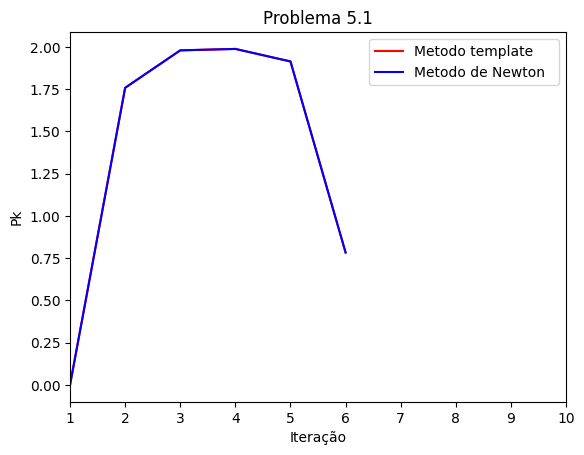

------------------------------------------------------------------
-----------------Problema 5.2----------------
   Usando Metodo template 
      Tempo : 0.0016199309999933575
   Usando Metodo de Newton  
      Tempo : 0.0006063440000048104


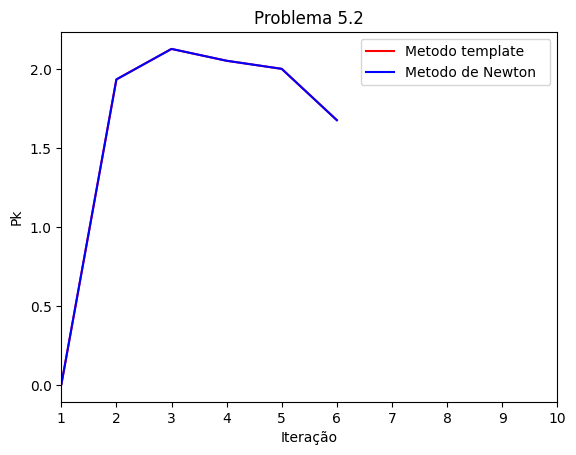

------------------------------------------------------------------
-----------------Problema 5.3----------------
   Usando Metodo template 
      Tempo : 0.0008922180000041635
   Usando Metodo de Newton  
      Tempo : 0.0010714280000030385


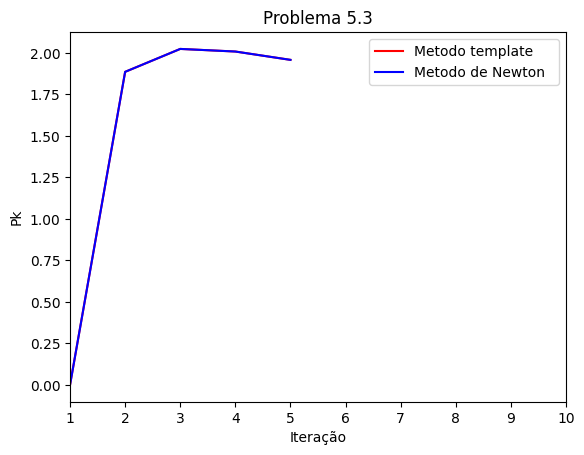

------------------------------------------------------------------
-----------------Problema 5.4----------------
   Usando Metodo template 
      Tempo : 0.001001572000006945
   Usando Metodo de Newton  
      Tempo : 0.0010969589999945129


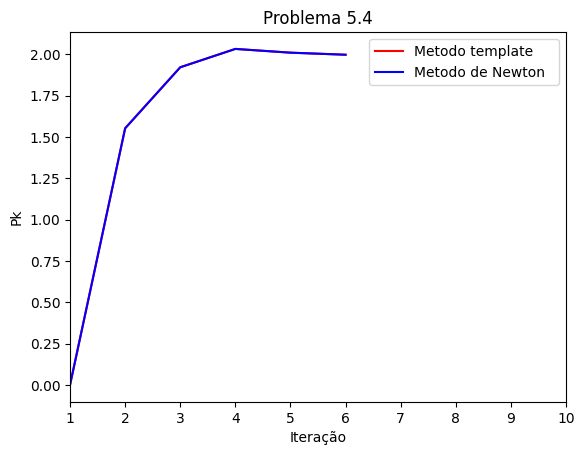

------------------------------------------------------------------


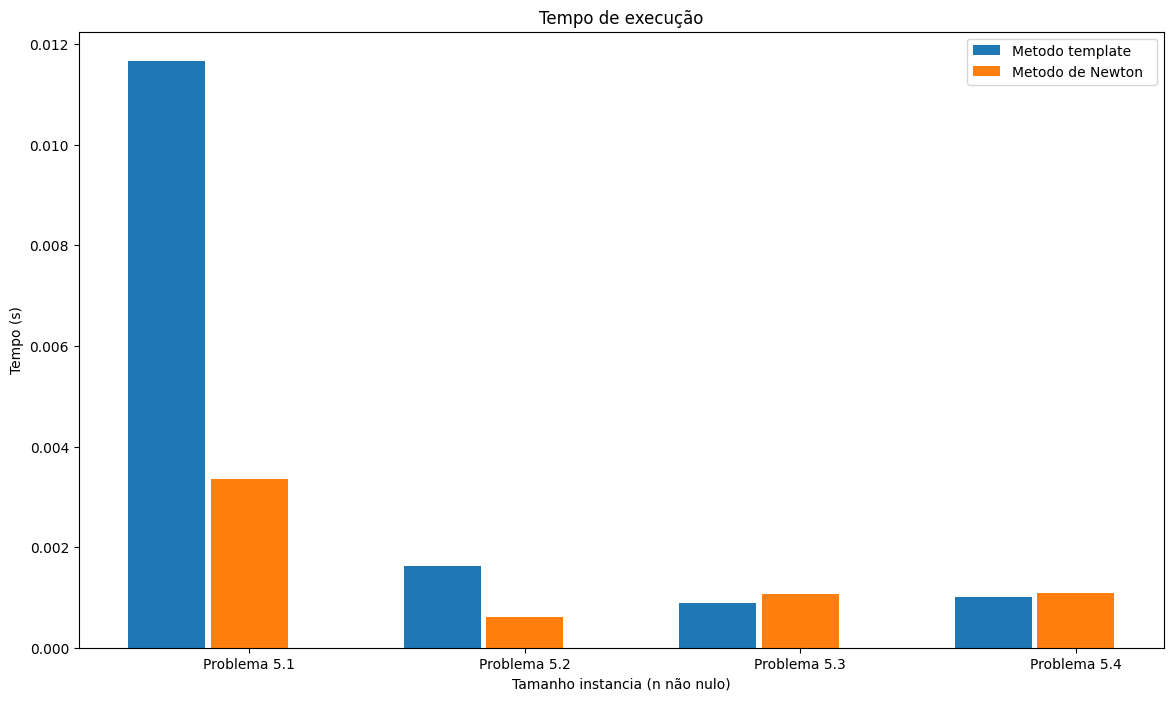

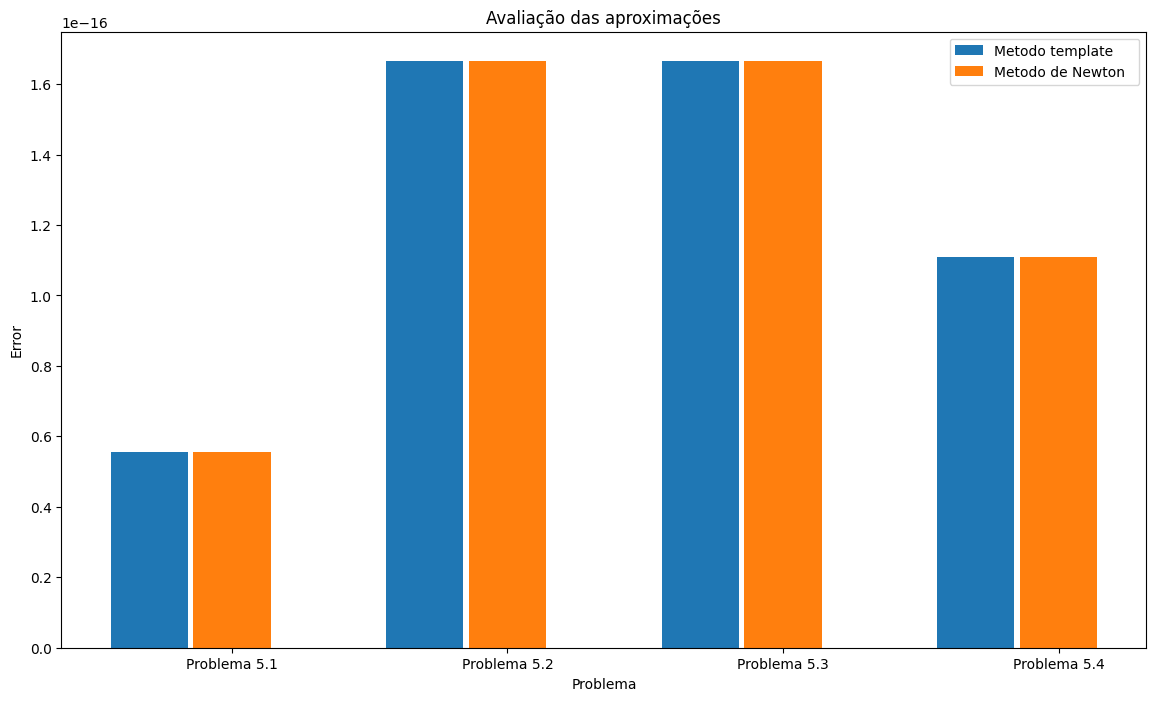

In [1]:

"""
@author: yanbw
"""

import scipy.io as sio
import numpy as np
import time
import math
import matplotlib.pyplot as plt

import scipy.sparse.linalg as spla
import random
from scipy.sparse.linalg import spsolve

import sympy as sp


colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown', 'gray', 'cyan', 'magenta', 'teal', 'lavender', 'maroon', 'navy', 'olive', 'turquoise', 'indigo', 'salmon', 'gold']

import numpy as np

def calculate_jacobian(equations, vars, h=1e-6):

    n = len(vars)
    jac = np.zeros((n, n))

    for i in range(n):
        vars_perturbed = vars.copy()
        vars_perturbed[i] += h

        eq_perturbed = equations(vars_perturbed)

        for j in range(n):
            jac[j, i] = (eq_perturbed[j] - equations(vars)[j]) / h

    return jac






#implementação dos metodos
x = sp.symbols('x')
f = x**3 + 2*x**2 - 5*x + 1


def find_all_roots(F):
    roots = []
    for guess in F[2]:
        result = root(F[0], guess, jac=F[1])
        if result.success:
            for k in roots:
                if (result.x==k).all():
                    continue
            roots.append(result.x)
    return np.array(roots)

from scipy.optimize import root
import numpy as np

##---------------------------------------------------------------------------------##
##Adicionar problemas aqui

##P1 5.1
def equations(vars=[0,0]): ##Tem que ser esse o cabeçalho!!
    x, y = vars
    eq1 = x*x*x -3*x*y*y -1
    eq2 = 3*x*x-y*y*y
    return [eq1, eq2]
F1=[equations,lambda j:calculate_jacobian(equations,j),[(-2, 1.987987987987988)]]
##Formato Fx=[equações,jacobiano, chute inicial]





##P2 5.2
def equations2(vars=[0,0]): ##Tem que ser esse o cabeçalho!!
    x, y = vars
    eq1 = pow(x,5)- 10*pow(x,3)*y*y + 5*x*pow(y,4)-1
    eq2 = 5*pow(x,4)*y-10*x*x*y*y*y + pow(y,5)
    return [eq1, eq2]


F2=[equations2,lambda j:calculate_jacobian(equations2,j),[(  -1.395395395395395, -1.191191191191191)]]




##P3 5.3
def equations3(vars=[0,0]): ##Tem que ser esse o cabeçalho!!
    x, y = vars
    eq1 = pow(x,2) -pow(y,2)-1
    eq2 = (pow(x,2)+pow(y,2)-1)*(pow(x,2)+pow(y,2)-2)
    return [eq1, eq2]


F3=[equations3,lambda j:calculate_jacobian(equations3,j),[(  -1.395395395395395, -1.191191191191191)]]



##P4 5.4
def equations4(vars=[0,0]): ##Tem que ser esse o cabeçalho!!
    x, y = vars
    eq1 = pow(x,2) - pow(y,2) -1
    eq2 = (pow(x,2) +x*y + pow(y,2)-1)*(pow(x,2) +x*y + pow(y,2)-2)
    return [eq1, eq2]


F4=[equations4,lambda j:calculate_jacobian(equations4,j),[(  -1.395395395395395, -1.191191191191191)]]

##---------------------------------------------------------------------------------##


##---------------------------------------------------------------------------------##
#Adicionar métodos aqui, formato:


    #Metodo
    #Input -> initial guess=[Array com o chute initical], F array que descreve o problema no estilo acima
    #Output -> X lista com os valores de x que o método encontrou a cada passo
def newton_method_system(initial_guess, F, max_iterations=100, tol=1e-12):
    x = np.array(initial_guess)
    iteration = 0
    X = []
    while iteration < max_iterations:
        f = F[0](x)
        J = F[1](x)

        delta_x = np.linalg.solve(J, -np.array(f))
        x = x + delta_x
        X.append(x.copy())

        if np.linalg.norm(delta_x) < tol:
            break

        iteration += 1

    return X


#Segue um template com o metodo de newton que pode ser modificado com o método de cada um
def template(initial_guess, F, max_iterations=100, tol=1e-12):
    x = np.array(initial_guess)
    iteration = 0
    X = []
    while iteration < max_iterations:
        f = F[0](x)
        J = F[1](x)

        delta_x = np.linalg.solve(J, -np.array(f))
        x = x + delta_x
        X.append(x.copy())

        if np.linalg.norm(delta_x) < tol:
            break

        iteration += 1

    return X
##---------------------------------------------------------------------------------##

##---------------------------------------------------------------------------------##
# Defina aqui os problemas,

#Defina aqui a lista de metodos a ser usados para resolver os problemas usando as funçoes implementadas na forma F(initial_guess,F)
methods={
     "Metodo template ":template,
      "Metodo de Newton  ":newton_method_system,



    }

#Defina os problemas
problems={
    "Problema 5.1":F1,

    "Problema 5.2":F2,

    "Problema 5.3":F3,

    "Problema 5.4":F4,

    }
##---------------------------------------------------------------------------------##

import csv

def estimate_convergence_order(X):
    n_iterations = X.shape[0]
    convergence_orders = np.zeros(n_iterations - 1)

    for i in range(3, n_iterations):
        ek_plus_1_norm = np.linalg.norm(X[i] - X[i-1],ord=2)
        ek_norm = np.linalg.norm(X[i - 1] - X[i-2],ord=2)
        ek_minus_1_norm = np.linalg.norm(X[i - 2] - X[i-3],ord=2)

        convergence_orders[i-1] = np.log(ek_plus_1_norm / ek_norm) /  np.log(ek_norm / ek_minus_1_norm)

    return convergence_orders
##Dado um problema testa cada um dos metodos
norm=lambda e:np.linalg.norm(e,2)
def func(F,lb,methods=methods):
    shape=np.shape(F[0]())




   # initial_guess=x_numpy
    t=np.zeros(len(methods))
    e=np.zeros(len(methods))
    NIT = 80
    i=0
    for label, method in methods.items():
        print("   Usando",label)


        start_time = time.perf_counter()
      #  print (method)
        x_kaczmarz=[]
        for v,initial_guess in enumerate(F[2]):
            x_kaczmarz.append(method(initial_guess, F,max_iterations=NIT+1))

        t1 = time.perf_counter() - start_time
        e[i]=np.abs(np.mean(F[0](x_kaczmarz[0][-1])))

        print("      Tempo :", t1)



        t[i]=t1


        o=estimate_convergence_order(np.array(x_kaczmarz[0]))

        plt.plot(o,label=label,color=colors[i])
        plt.legend(loc="best")
        plt.xlabel('Iteração')
        plt.xlim(1,10)
        plt.ylabel('Pk')
        plt.title(lb)

        i+=1
    plt.show()
    print("------------------------------------------------------------------")

    return t,e


labels=list(methods.keys())


errs=np.zeros((len(problems),len(labels)))
Ts=np.zeros((len(problems),len(labels)))
n=np.zeros(len(problems))
N=np.zeros(len(problems))
u=0


##Chama a funcao para cada caso e ja processa os dados
with open("out.csv", 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(["File","Algoritmo","Tempo","Erro R2 "])
            for label,m in problems.items():
                print("-----------------"+label+"----------------")
                ts,es=func(m,label)
                for i,met in enumerate(labels):
                    writer.writerow([m,met,ts[i],es[i]])
                Ts[u]=ts
                #print(Ts)
                errs[u]=es
                u+=1



##Pos processamento e plots
x,y=np.zeros((len(problems)*len(labels))),np.zeros((len(problems)*len(labels)))
plt.figure(figsize=(14,8))

for i in range(0,len(labels)):
    x,y=n,Ts.T[i]
    plt.bar(np.array(range(len(x)))+(-0.30 + 0.3*i)  , y,width=0.28,label=labels[i])
    plt.legend(loc="best")
    plt.xticks(range(len(x)), problems)

plt.xlabel('Tamanho instancia (n não nulo)')
plt.ylabel('Tempo (s)')
plt.title('Tempo de execução')

plt.show()
plt.figure(figsize=(14,8))


for i in range(0,len(labels)):
    x,y=n,errs.T[i]
    plt.bar(np.array(range(len(x)))+(-0.30 + 0.3*i)  , y,width=0.28,label=labels[i])
    plt.legend(loc="best")
    plt.xticks(range(len(x)), problems)

plt.xlabel('Problema')
plt.ylabel('Error')

plt.title('Avaliação das aproximações')


plt.show()



